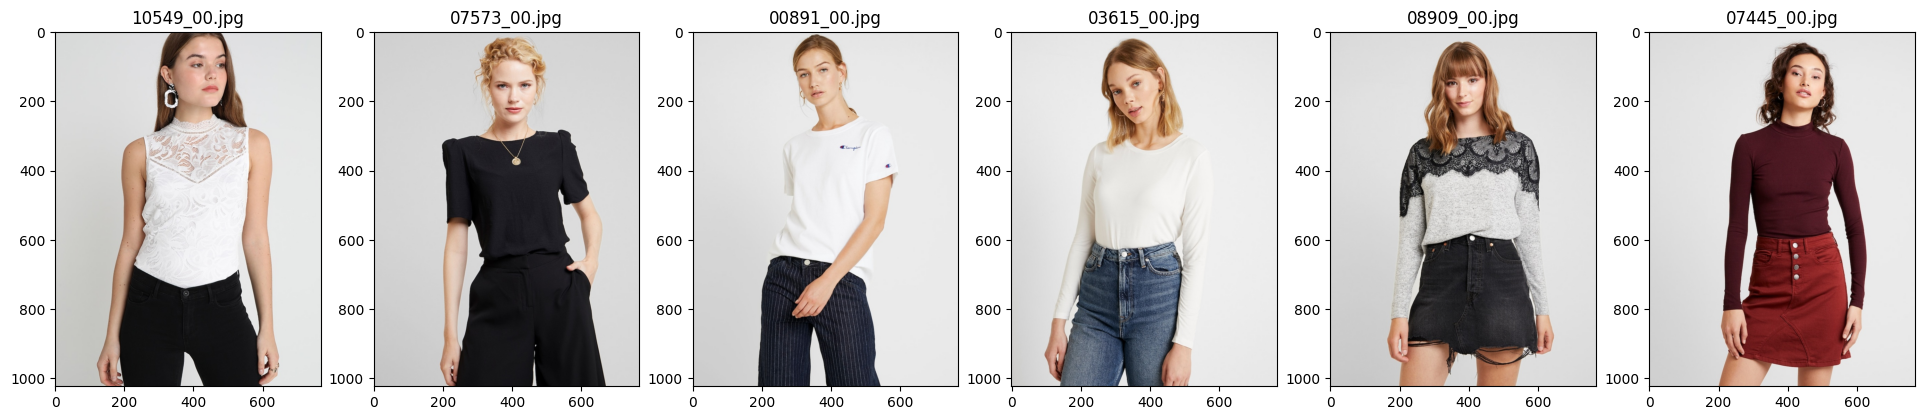

In [19]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

def show_imgs(imgs, horizon=True, h=24, w=12):
    plt.figure(figsize=(h, w), dpi=100)
    for i, img in enumerate(imgs):
        if horizon:
            sub_plt = plt.subplot(1, len(imgs), i+1)
        else:
            sub_plt = plt.subplot(len(imgs), 1, i+1)
        _, img_name = img.rsplit('/', 1)
        img = cv2.imread(img)
        sub_plt.imshow(img[:,:,::-1])
        sub_plt.set_title(img_name)

img_root_dir = Path('./datasets')
imgs = [ str(i) for i in img_root_dir.rglob('./test/image/*.jpg')]
imgs

show_imgs(imgs)

In [5]:
import torch
import torch.nn as nn
import torchgeometry as tgm

class opt:
    # 目标分辨率的 H、W
    load_height = 1024
    load_width = 768
    # human-parsing map classes
    semantic_nc = 13
    dataset_dir = './datasets/'
    dataset_mode = 'test'
    dataset_list = 'test_pairs.txt'
    


In [6]:
up = nn.Upsample(size=(opt.load_height, opt.load_width), mode='bilinear')
gauss = tgm.image.GaussianBlur((3, 3), (1, 1))
gauss.cuda()

GaussianBlur()

In [7]:
from torchvision import transforms
img_array = cv2.imread(imgs[0])
img_array
# HWC -> CHW and [0, 255] -> [0, 1]
img_tensor = transforms.ToTensor()(img_array)
# [0, 1] -> [-1, 1]: (input[chanel] - mean[chanel])/ std[chanel]
img_tensor = transforms.Normalize((.5, .5, .5), (.5, .5, .5))(img_tensor)

In [8]:
img_tensor.shape

torch.Size([3, 1024, 768])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


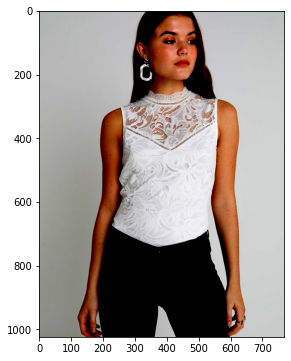

In [9]:
fig = plt.figure(figsize=(12,6))
plt.imshow(img_tensor.permute(1,2,0).numpy()[:,:,::-1])

In [10]:
from datasets import VITONDataset, VITONDataLoader
test_dataset = VITONDataset(opt)
# test_loader = VITONDataLoader(opt, test_dataset)

In [11]:
test_dataset[0]

/root/miniconda3/envs/jia/lib/python3.7/site-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


{'img_name': '08909_00.jpg',
 'c_name': {'unpaired': '925945766.jpg'},
 'img': tensor([[[0.7020, 0.7020, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          [0.7020, 0.7020, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          [0.7020, 0.6941, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.7020, 0.7020, 0.7020],
          [0.5608, 0.5608, 0.5608,  ..., 0.7020, 0.7020, 0.7020],
          [0.5608, 0.5608, 0.5608,  ..., 0.7020, 0.7020, 0.7020]],
 
         [[0.7020, 0.7020, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          [0.7020, 0.7020, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          [0.7020, 0.6941, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.7020, 0.7020, 0.7020],
          [0.5608, 0.5608, 0.5608,  ..., 0.7020, 0.7020, 0.7020],
          [0.5608, 0.5608, 0.5608,  ..., 0.7020, 0.7020, 0.7020]],
 
         [[0.7020, 0.7020, 0.6941,  ..., 0.7020, 0.7020, 0.7020],
          [0.7020, 0.7020, 0

In [13]:
from PIL import Image
import numpy as np

test_clo = Image.open('./datasets/test/cloth/01430_00.jpg')
print(test_clo)
test_clo_resize = transforms.Resize(opt.load_width, interpolation=transforms.InterpolationMode.BILINEAR)(test_clo)
print(test_clo_resize)
np.array(test_clo_resize).shape

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x7F60943A9750>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x7F60943A9750>


(1024, 768, 3)

In [14]:
test_mask = Image.open('./datasets/test/cloth-mask/01430_00.jpg')
test_mask_resize = transforms.Resize(opt.load_width, interpolation=transforms.InterpolationMode.NEAREST)(test_mask)
test_mask_resize = np.array(test_mask_resize)
print(test_mask_resize)
test_mask_resize = (test_mask_resize >= 128).astype(np.float32)
test_mask_resize

# test_mask_resize = torch.from_numpy(test_mask_resize)
# print(test_mask_resize)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 254 254 254 254 254 254 254 232   0   0   0   0
    0   0]
 [  0   0   0   0 254 254 254 254 254 254 254 254 253 254 254 158   0   0
    0   0]
 [  0   0   0 185 254 255 255 255 255 254 255 255 255 255 254 254   0   0
    0   0]
 [  0   0   0 254 254 255 255 255 254 254 254 254 255 255 254 254 254   0
    0   0]
 [  0   0   0 254 254 254 254 254 255 254 255 254 254 254 254 254 254   0
    0   0]
 [  0   0 254 254 254 254 254 254 255 254 255 254 254 254 254 254 254 254
    0   0]
 [  0   0 255 254 254 254 254 254 254 255 255 254 254 254 216 254 254 255
    0   0]
 [  0   0   0   0   0   0 254 254 254 255 254 254 255 254   0   0

torch.Size([1, 26, 20])

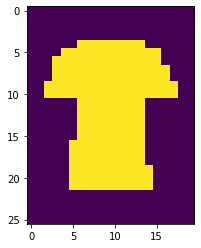

In [42]:
test_cm = Image.open('./datasets/test/cloth-mask/01430_00.jpg')
#test_cm = transforms.Resize(opt.load_width, interpolation=transforms.InterpolationMode.NEAREST)(test_cm)
test_cm = transforms.Resize(20, interpolation=transforms.InterpolationMode.NEAREST)(test_cm)
test_cm = np.array(test_cm)
print(test_cm)
print(test_cm.shape)
plt.imshow(test_cm)

# 二值灰度 [0,1]
test_cm = (test_cm >= 128).astype(np.float32)
print(test_cm.shape)
plt.imshow(test_cm)
print(test_cm)
test_cm = torch.from_numpy(test_cm)
test_cm.unsqueeze_(0)
test_cm.shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0
    0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255 255  10   0   0
    0   0]
 [  0   0   0 248 255 255 255 255 255 255 255 255 255 255 255 255   0   0
    0   0]
 [  0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0
    0   0]
 [  0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0
    0   0]
 [  0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
    0   0]
 [  0   0 255 255 255 255 255 255 255 255 255 255 255 255 248 255 255 255
    0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255 255   0   0

torch.Size([1, 26, 20])

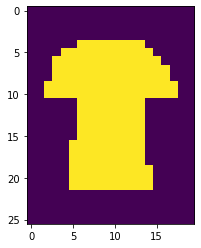

In [43]:
test_cm = Image.open('./datasets/test/cloth-mask/01430_00_bak.jpg')
#test_cm = transforms.Resize(opt.load_width, interpolation=transforms.InterpolationMode.NEAREST)(test_cm)
test_cm = transforms.Resize(20, interpolation=transforms.InterpolationMode.NEAREST)(test_cm)
test_cm = np.array(test_cm)
print(test_cm)
print(test_cm.shape)
plt.imshow(test_cm)

# 二值灰度 [0,1]
test_cm = (test_cm >= 128).astype(np.float32)
print(test_cm.shape)
plt.imshow(test_cm)
print(test_cm)
test_cm = torch.from_numpy(test_cm)
test_cm.unsqueeze_(0)
test_cm.shape

In [44]:
test_pose_rgb = Image.open('./datasets/test/openpose-img/00891_00_rendered.png')
print(test_pose_rgb)
test_pose_rgb = transforms.Resize(opt.load_width, interpolation=transforms.InterpolationMode.BILINEAR)(test_pose_rgb)
np.array(test_pose_rgb).shape

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024 at 0x7F60775C8610>


(1024, 768, 3)

In [45]:
import json
with open('./datasets/test/openpose-json/00891_00_keypoints.json', 'r') as f:
    pose_label = json.load(f)
    pose_data = pose_label['people'][0]['pose_keypoints_2d']

pose_data = np.array(pose_data)
print(len(pose_data))
pose_data = pose_data.reshape((-1, 3))[:,:2]
print(len(pose_data))
print(pose_data)

75
25
[[ 349.091  147.821]
 [ 400.138  317.836]
 [ 292.373  329.363]
 [ 303.693  513.417]
 [   0.       0.   ]
 [ 513.438  303.726]
 [ 527.623  547.373]
 [ 394.255  720.279]
 [ 351.821  711.821]
 [ 272.552  697.645]
 [ 266.87   995.149]
 [   0.       0.   ]
 [ 428.392  723.103]
 [ 473.774 1000.79 ]
 [   0.       0.   ]
 [ 326.226  125.155]
 [ 374.579  113.822]
 [ 306.453  147.828]
 [ 425.595  122.235]
 [   0.       0.   ]
 [   0.       0.   ]
 [   0.       0.   ]
 [   0.       0.   ]
 [   0.       0.   ]
 [   0.       0.   ]]


## Huamn parsing(part segmentation)

1
[[ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 13  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 13 13 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13 13 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13 13 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13 10 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10 10 10  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  5  5  5  5  5  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  5  5  5  5  5  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  5  5  5  5  5  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  5  5  5  5  5  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  5  5  5  5 14 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  5  5  5  5 14 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  5  5  5  5 14 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  5  5  5  5  5 14 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  5  5  5  5  5 14 14  0  0  0 

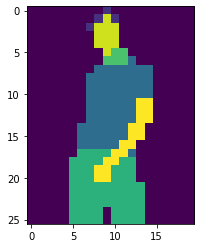

In [51]:
# load parsing image
parse = Image.open('./datasets/test/image-parse/00891_00.png')

print(len(parse.split()))

#parse = transforms.Resize(opt.load_width, interpolation=transforms.InterpolationMode.NEAREST)(parse)
parse = transforms.Resize(20, interpolation=transforms.InterpolationMode.NEAREST)(parse)

parse_array = np.array(parse)
print(parse_array)
print(parse_array.shape)
plt.imshow(parse_array)

#print(parse_array[789])

In [48]:
CLASSES = ['background', 'hat', 'hair', 'glove', 'sunglasses', 'upperclothes',
               'dress', 'coat', 'socks', 'pants', 'tosor-skin', 'scarf', 'skirt',
               'face', 'leftArm', 'rightArm', 'leftLeg', 'rightLeg', 'leftShoe', 'rightShoe']


In [207]:
CLASSES[14]

'leftArm'

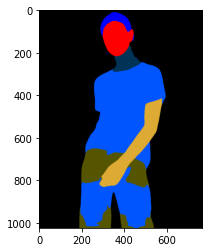

In [80]:
# by CIHP-PGN inference
img = cv2.imread('./00891_00_vis.png')
plt.imshow(img)

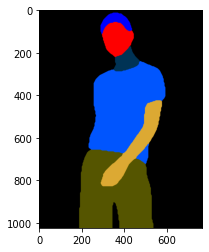

In [81]:
# demo input human parsing
img_02 = cv2.imread('./datasets/test/image-parse/00891_00.png')
plt.imshow(img_02)

In [77]:
(img_02 != img).reshape([-1,]).sum()

320302

In [78]:
len((img_02 != img).reshape([-1,]))

2359296

In [79]:
320302/2359296

0.13576168484157985